Given
$ \displaystyle
    \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} = 0
$
find $y$

<!-- $ \displaystyle
\mathcal{L} = \int_{C} \left| \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} \right| \; dC
$ -->

$ \displaystyle
\mathcal{L} = \int_{C} \left( \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} \right)^2 \; dC
$


$C$ – $c_1$, $c_2$ space


\begin{cases}
    c_1 = \sigma^2 \quad \text{(normalizuotas)}\\
    c_2 = 1
\end{cases}



# DARTS

$ \displaystyle
\overline{o}^{(i, j)}(x) = \sum_{o \in \mathcal{O}} \left( \alpha_o^{(i,j)} o(x) \right)
\\ \displaystyle
\forall (i, j) \; R = (\sum_{o \in \mathcal{O}} \alpha_o^{(i, j)} - 1)^2
$

# Code

In [1]:
import sympy as sp
from jax import random
import jax.numpy as np

# !rm /etc/localtime
# !ln -s /usr/share/zoneinfo/Europe/Vilnius /etc/localtime

from util.plot import Plotting
from util.print import a, d, pad, info
from util.dotdict import DotDict
from network import Network
from train import train

In [2]:
# def actual_func(z, c_1, c_2=1, c_3=0):
#     return c_1 * z - c_2 * c_1 * np.log(c_2 + z) + c_3

In [3]:
c1 = sp.symbols('c_1')
x_bounds = (0, 1)
c1_bounds = (0.01, 0.2)

In [4]:
loss_model_func = lambda model_y, x, model_d2y: sp.Pow(model_d2y - c1 * (model_y) / (1 + model_y), 2, evaluate=False)
loss_integration_func = lambda loss_model: (loss_model, (c1, *c1_bounds))

In [5]:
def orig_func(x, c2):
  S_0 = 1
  d = 1
  alpha = np.sqrt(c2)
  return S_0 * np.cosh(alpha * x) / np.cosh(alpha * d)

In [6]:
cell_count = 4
network = Network(
  loss_model_func,
  loss_integration_func,
  [
    lambda z: 0,
    lambda z: 1,
    lambda z: z,
    lambda z: 1 + z,
    lambda z: -z,
    lambda z: z*z,
    lambda z: z*z*z*z,
    lambda z: (sp.exp(z) + sp.exp(-z)) / 2,
    # lambda z: sp.sin(z),
    # lambda z: sp.exp(z),
    # lambda z: sp.Max(z, np.array(0)),
    # lambda z: 1 / (1 + sp.exp(-z))
  ],
  cell_count,
  x_bounds)

_, model_y, loss_and_grad, _ = network.get_model()

12:46:16.683 [INFO] Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
12:46:16.684 [INFO] Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Host Interpreter
12:46:16.685 [INFO] Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
12:46:17.147 [INFO] Constructed symbolic model
12:46:17.207 [INFO] Integrated
12:46:18.794 [INFO] Substituted y's with replacements
12:46:18.828 [INFO] Added boundary condition
12:46:19.811 [INFO] Lambdified
12:46:19.812 [INFO] Constructed JAXified model


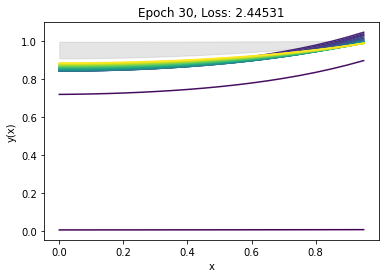

12:46:27.686 [INFO] W = [ 0.1784,  0.1314,  0.1188,  0.0712,  0.2378,  0.0925,  0.0408,  0.0819,  0.1814,  0.1331,  0.1225,  0.0746,  0.2403,  0.0897,  0.0306,  0.0808,  0.1869,  0.1612,  0.1374,  0.1096,  0.2409,  0.0448, -0.0000,  0.0726,  0.1491,  0.1011,  0.1164,  0.0686,  0.1827,  0.1289,  0.1424,  0.0908,  0.1511,  0.1244,  0.0890,  0.0633,  0.2125,  0.1047,  0.1330,  0.1010,  0.1721,  0.1450,  0.0858,  0.0590,  0.2578,  0.0754,  0.0770,  0.0932, -0.0255]
12:46:27.687 [INFO] Pruning weights...
12:46:27.841 [INFO] Shed 0.7149966955184937 weight
12:46:27.962 [INFO] Constructed symbolic model
12:46:27.1000 [INFO] Integrated
12:46:28.393 [INFO] Substituted y's with replacements
12:46:28.405 [INFO] Added boundary condition
12:46:28.704 [INFO] Lambdified
12:46:28.705 [INFO] Constructed JAXified model


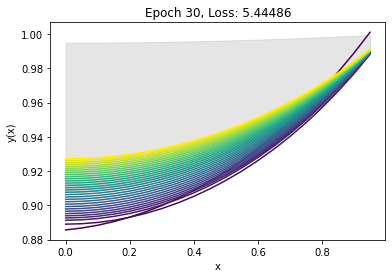

12:46:32.839 [INFO] W = [ 0.2317,  0.1959,  0.1413,  0.1272,  0.0729,  0.2648,  0.0893,  0.0194,  0.0804,  0.2032,  0.1796,  0.1431,  0.1174,  0.2678,  0.0166,  0.0001,  0.0636,  0.1536,  0.0992,  0.1233,  0.0691,  0.1849,  0.1326,  0.1468,  0.0886,  0.1533,  0.1287,  0.0937,  0.0702,  0.2123,  0.1045,  0.1348,  0.1041,  0.1803,  0.1552,  0.0859,  0.0612,  0.2740,  0.0714,  0.0732,  0.0969, -0.0234]
12:46:32.844 [INFO] Pruning weights...
12:46:32.920 [INFO] Shed 0.7264432907104492 weight
12:46:32.989 [INFO] Constructed symbolic model
12:46:33.300 [INFO] Integrated
12:46:33.262 [INFO] Substituted y's with replacements
12:46:33.270 [INFO] Added boundary condition
12:46:33.496 [INFO] Lambdified
12:46:33.496 [INFO] Constructed JAXified model


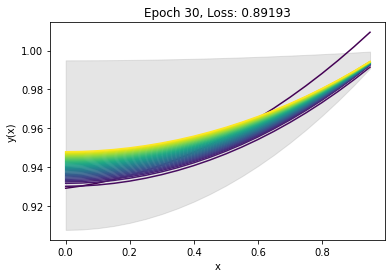

12:46:37.157 [INFO] W = [ 0.2300,  0.2632,  0.2085,  0.1870,  0.1406,  0.1171,  0.2808,  0.0025,  0.0001,  0.0593,  0.1538,  0.0997,  0.1230,  0.0691,  0.1854,  0.1329,  0.1470,  0.0891,  0.1524,  0.1300,  0.0946,  0.0732,  0.2095,  0.1025,  0.1337,  0.1048,  0.1795,  0.1567,  0.0876,  0.0651,  0.2708,  0.0706,  0.0724,  0.0982, -0.0213]
12:46:37.161 [INFO] Pruning weights...
12:46:37.223 [INFO] Shed 0.7150818705558777 weight
12:46:37.279 [INFO] Constructed symbolic model
12:46:37.321 [INFO] Integrated
12:46:37.477 [INFO] Substituted y's with replacements
12:46:37.481 [INFO] Added boundary condition
12:46:37.668 [INFO] Lambdified
12:46:37.668 [INFO] Constructed JAXified model


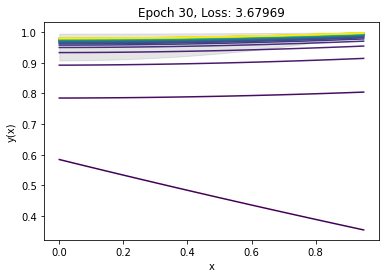

12:46:40.986 [INFO] W = [ 0.2587,  0.2946,  0.0677,  0.1634,  0.0815,  0.1403,  0.0586,  0.1874,  0.1413,  0.1566,  0.0703,  0.1221,  0.1953,  0.0132,  0.0875,  0.2303,  0.0785,  0.1039,  0.1732,  0.1518,  0.2245,  0.0226,  0.0957,  0.2803,  0.0280,  0.0428,  0.1586,  0.0743]
12:46:40.991 [INFO] Pruning weights...
12:46:41.510 [INFO] Shed 0.8120631575584412 weight
12:46:41.830 [INFO] Constructed symbolic model
12:46:41.127 [INFO] Integrated
12:46:41.204 [INFO] Substituted y's with replacements
12:46:41.208 [INFO] Added boundary condition
12:46:41.292 [INFO] Lambdified
12:46:41.293 [INFO] Constructed JAXified model


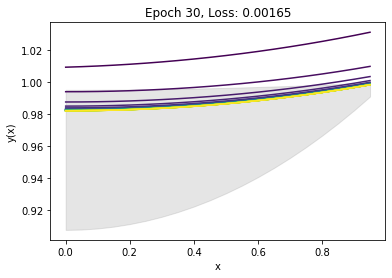

12:46:43.750 [INFO] W = [ 0.2581,  0.2937,  0.0732,  0.1877,  0.1235,  0.1912,  0.0160,  0.0848,  0.2302,  0.0798,  0.1052,  0.1691,  0.1531,  0.2204,  0.0252,  0.0929,  0.2803,  0.0293,  0.0441,  0.1545,  0.0689]
12:46:43.754 [INFO] Pruning weights...
12:46:43.815 [INFO] Shed 0.7696349620819092 weight
12:46:43.833 [INFO] Constructed symbolic model
12:46:43.877 [INFO] Integrated
12:46:43.908 [INFO] Substituted y's with replacements
12:46:43.910 [INFO] Added boundary condition
12:46:43.966 [INFO] Lambdified
12:46:43.966 [INFO] Constructed JAXified model


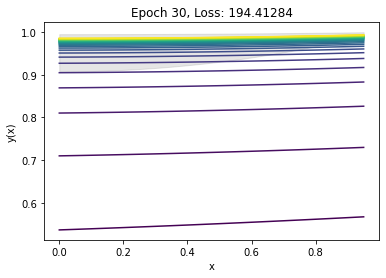

12:46:46.150 [INFO] W = [ 0.2575,  0.3059,  0.0657,  0.1845,  0.2321,  0.0783,  0.3129,  0.0001,  0.1835,  0.2074,  0.0001,  0.0001,  0.2526,  0.2362]
12:46:46.200 [INFO] Pruning weights...
12:46:46.790 [INFO] Shed 0.7221872806549072 weight
12:46:46.860 [INFO] Constructed symbolic model
12:46:46.126 [INFO] Integrated
12:46:46.136 [INFO] Substituted y's with replacements
12:46:46.138 [INFO] Added boundary condition
12:46:46.154 [INFO] Lambdified
12:46:46.155 [INFO] Constructed JAXified model


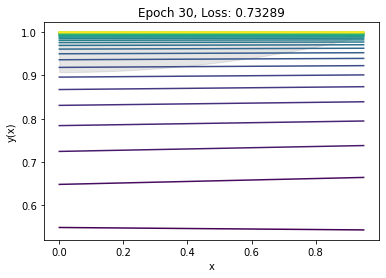

12:46:47.812 [INFO] W = [ 0.2587,  0.3059,  0.0604,  0.1845,  0.2335,  0.5382,  0.4615]
12:46:47.817 [INFO] Pruning weights...
12:46:47.861 [INFO] Constructed symbolic model
12:46:47.913 [INFO] Integrated
12:46:47.915 [INFO] Substituted y's with replacements
12:46:47.916 [INFO] Added boundary condition
12:46:47.931 [INFO] Lambdified
12:46:47.932 [INFO] Constructed JAXified model


Nothing more to prune!


In [7]:
plotting = Plotting(orig_func, network, x_bounds, c1_bounds)

key = random.PRNGKey(7)

key, subkey = random.split(key)
W = random.uniform(subkey, shape=(len(network.alphas),), minval=0, maxval=0.001)

is_final = False

best = DotDict({"loss": np.inf})

while not is_final:
    plotting.funcs = []
    train_results = train(
        network,
        dataset = [(1, 1)],
        plotting = plotting,
        key = key,
        lr = 0.0002,
        lr_2 = 0.001,
        epochs = 30,
        verbose = 0,
        batch_size = 16,
        W_init = W,
        best = best
    )

    W = train_results.W
    loss_history = train_results.loss_history

    info('Pruning weights...')
    network.assign_weights(W)
    W, model_y, loss_and_grad, is_final = network.prune_auto()

In [8]:
float(best.loss)

0.00017666968051344156

In [15]:
y_prediction_last = model_y.subs(zip(network.alphas, W))
y_prediction_last

1.68365396850945e-5*x + 0.999640494585037

In [16]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.000624945114711671*x**4 + 0.00704793049210772*x**2 - 5.41056284945884e-6*x + 0.0772417634725571*exp(0.245182509164652*x) + 0.0845580995082855*exp(0.257980287075043*x) + 0.658513858914375 + 0.0845580995082855*exp(-0.257980287075043*x) + 0.0772417634725571*exp(-0.245182509164652*x)

In [19]:
y_prediction_best.rewrite(sp.cos)

0.000624945114711671*x**4 + 0.00704793049210772*x**2 - 5.41056284945884e-6*x + 0.154483526945114*cosh(0.245182509164652*x) + 0.169116199016571*cosh(0.257980287075043*x) + 0.658513858914375

Total loss su išgautu modeliu

$ \displaystyle
\mathcal{L} = \int_{x} \int_{c_1} \left( \frac{d^2 y}{d x^2} - \frac{c_1 y}{1 + y} \right)^2 \; dc_1 \; dx
$


In [17]:
y_prediction_last_lambd = sp.lambdify([network.x], y_prediction_last, modules=network.lambdify_modules, cse=True)
y_prediction_best_lambd = sp.lambdify([network.x], y_prediction_best, modules=network.lambdify_modules, cse=True)

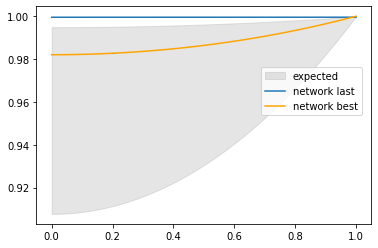

In [18]:
import matplotlib.pyplot as plt

xspace = np.linspace(*x_bounds, 100)

plotting.show_c2varied_plot(plotting.actual_func, xspace, plotting.c2_bounds)
plt.plot(xspace, y_prediction_last_lambd(xspace), label='network last')
plt.plot(xspace, y_prediction_best_lambd(xspace), color='orange', label='network best')
plt.legend(loc=(0.67, 0.5))
plt.show()

In [13]:
# c1_integrated_model = network.get_integrated_model_nolambdify(y_prediction_best)

In [14]:
# TODO:
# sp.integrate(c1_integrated_model, (network.x, 0, 1))